In [0]:
#! pip install -U numpy==1.15.4
! pip uninstall networkx
! pip install git+https://github.com/networkx/networkx.git

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx


Uninstalling networkx-2.5rc1.dev20200521215419:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/networkx-2.5rc1.dev20200521215419.dist-info/*
    /usr/local/lib/python3.6/dist-packages/networkx/*
    /usr/local/share/doc/networkx-2.5rc1.dev_20200521215419/LICENSE.txt
    /usr/local/share/doc/networkx-2.5rc1.dev_20200521215419/examples/3d_drawing/README.txt
    /usr/local/share/doc/networkx-2.5rc1.dev_20200521215419/examples/3d_drawing/mayavi2_spring.py
    /usr/local/share/doc/networkx-2.5rc1.dev_20200521215419/examples/README.txt
    /usr/local/share/doc/networkx-2.5rc1.dev_20200521215419/examples/advanced/README.txt
    /usr/local/share/doc/networkx-2.5rc1.dev_20200521215419/examples/advanced/plot_eigenvalues.py
    /usr/local/share/doc/networkx-2.5rc1.dev_20200521215419/examples/advanced/plot_heavy_metal_umlaut.py
    /usr/local/share/doc/networkx-2.5rc1.dev_20200521215419/examples/advanced/plot_iterated_dynamical_systems.py
    /usr/local/share/doc/networkx-2.5rc1.dev_20

# Análise simples de grafos

In [0]:
# funções para plotar distribuição

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    #plt.yscale('log')
    plt.show()

def plot_compsize_dist(G):
    sizes =[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
    plt.hist(sizes)
    #plt.yscale('log')
    plt.show()

def plot_cumulative_compsize_dist(G):
    sizes =[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
    cumulative = np.cumsum(sizes)
    plt.plot(cumulative)
    #plt.yscale('log')
    plt.show()

def plot_diameter_dist(G):
    diameters =[nx.diameter(G.subgraph(c)) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
    plt.hist(diameters)
    #plt.yscale('log')
    plt.show()

def plot_cliquesize_dist(G):
    sizes =[len(c) for c in sorted(nx.find_cliques(G), key=len, reverse=True) if len(c)>2 ]
    plt.hist(sizes)
    #plt.yscale('log')
    plt.show()



In [0]:
#carregando o grafo no networkx
G = nx.karate_club_graph()


Número de vértices:  34
Número de arestas:  78
Coeficiente de agrupamento:  0.5706384782076823
Número de triângulos  135
Número de componentes:  1


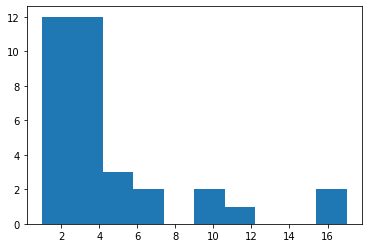

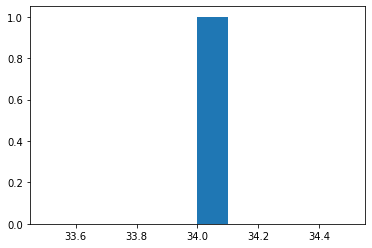

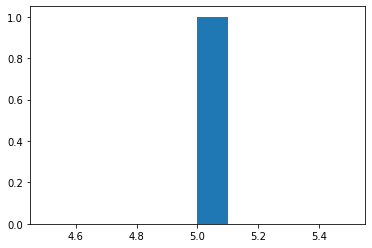

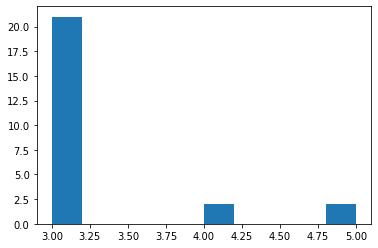

In [0]:

print("Número de vértices: ", len(G))
print("Número de arestas: ", G.number_of_edges())
print("Coeficiente de agrupamento: ", nx.average_clustering(G))
print("Número de triângulos ", sum(nx.triangles(G).values()) )
print("Número de componentes: ", len(list(nx.connected_components(G))))

plot_degree_dist(G)
plot_compsize_dist(G)
plot_diameter_dist(G)
plot_cliquesize_dist(G)

# Maior componente


Número de vértices:  34
Número de arestas:  78
Coeficiente de agrupamento:  0.5706384782076823
Número de triângulos  135
Distância média entre nós:  2.408199643493761


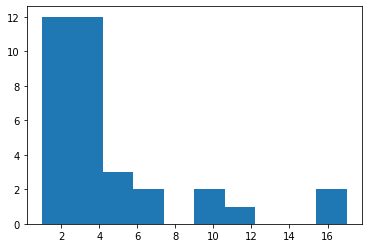

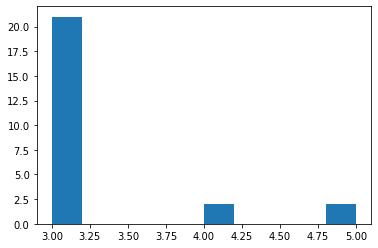

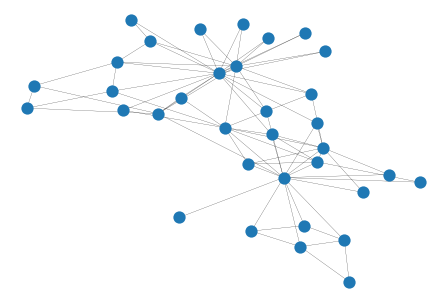

In [0]:
MaxCompSet = max(nx.connected_components(G), key=len)
MaxCompG = G.subgraph(MaxCompSet)


print("Número de vértices: ", len(MaxCompG))
print("Número de arestas: ", MaxCompG.number_of_edges())
print("Coeficiente de agrupamento: ", nx.average_clustering(MaxCompG))
print("Número de triângulos ", sum(nx.triangles(MaxCompG).values()) )
print("Distância média entre nós: ", nx.average_shortest_path_length(MaxCompG))
plot_degree_dist(MaxCompG)
plot_cliquesize_dist(MaxCompG)

options = {
    'node_color': 'black',
    'node_size': 150,
    'line_color': 'grey',
    'linewidths': 0.,
    'width': 0.2,
}
#node_color = [float(MaxCompG.degree(v)) for v in MaxCompG]
cores = nx.core_number(MaxCompG)
vals = np.fromiter(cores.values(), dtype=int)
nx.draw_spring(MaxCompG, **options)



## Detecção de comunidades

([0, 1, 2, 3, 7, 8, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33], [0, 4, 5, 6, 10, 16], [24, 25, 31])
([0, 1, 2, 3, 7, 8, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33], [0, 4, 5, 6, 10, 16], [24, 25, 31], [9], [11])


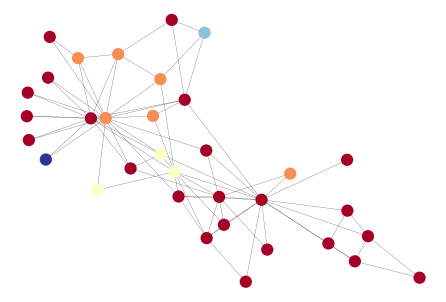

In [0]:
import networkx as nx
import networkx.algorithms.community as nxcom

#clique percolation
cs = nxcom.k_clique_communities(G, 3)

cs = tuple(sorted(c) for c in cs)
print(cs)

map_partition={}
i=0
# getting colors
for c in cs:
  for n in c:
    #print("node: ", n, " community: ", i)
    map_partition[n]=i
  i=i+1

for n in G.nodes():
  if n not in map_partition.keys():
    map_partition[n]=i
    cs = cs + ([n],)
    i=i+1

print(cs)
cols = [map_partition[key] for key in sorted(map_partition.keys(), reverse=True)]
nx.draw_spring(MaxCompG, cmap =  plt.cm.RdYlBu, node_color=cols, **options)

#não funciona quando tem overlap (um elemento está em mais de um grupo)
#print("Performance:", nxcom.performance(G,cs))
#print("Cobertura:", nxcom.coverage(G,cs))

In [0]:
#desenhando melhor as comunidades
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = {}
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = {}
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = {}

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = {}
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = {}
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

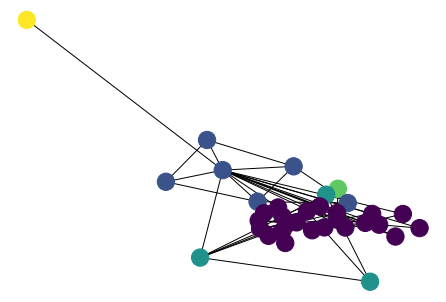

In [0]:
import collections

od = collections.OrderedDict(sorted(map_partition.items()))
pos = community_layout(G, od)

nx.draw(G, pos, node_color=list(od.values()))

<generator object girvan_newman at 0x7f0ab4450e60>
([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
Performance: 0.6114081996434938
Cobertura: 0.8717948717948718


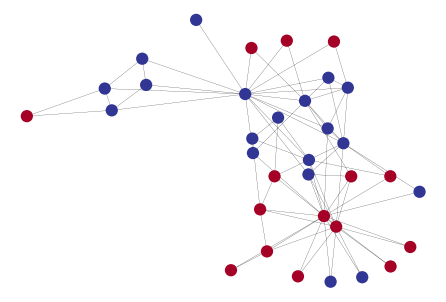

In [0]:
cs = nxcom.girvan_newman(G)

print(cs)

cs = tuple(sorted(c) for c in next(cs))
print(cs)


map_partition={}
i=0
# getting colors
for c in cs:
  for n in c:
    #print("node: ", n, " community: ", i)
    map_partition[n]=i
  i=i+1

for n in G.nodes():
  if n not in map_partition.keys():
    map_partition[n]=-1
    #i=i+1

cols = [map_partition[key] for key in sorted(map_partition.keys(), reverse=True)]

nx.draw_spring(MaxCompG, cmap =  plt.cm.RdYlBu, node_color=cols, **options)
print("Performance:", nxcom.performance(G,cs))
print("Cobertura:", nxcom.coverage(G,cs))

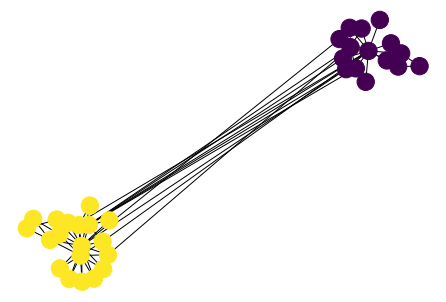

In [0]:
import collections

od = collections.OrderedDict(sorted(map_partition.items()))
pos = community_layout(G, od)

nx.draw(G, pos, node_color=list(od.values()))

Performance: 0.6684491978609626
Cobertura: 0.7692307692307693


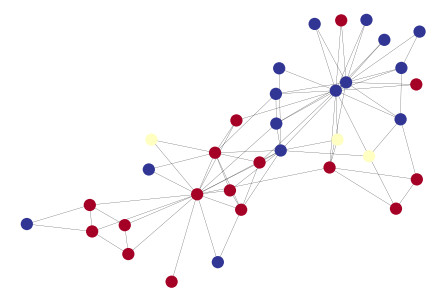

In [0]:
#label propagation

cs = nxcom.label_propagation_communities(G)
cs = tuple(sorted(c) for c in cs)

map_partition={}
i=0
# getting colors
for c in cs:
  for n in c:
    #print("node: ", n, " community: ", i)
    map_partition[n]=i
  i=i+1

for n in G.nodes():
  if n not in map_partition.keys():
    map_partition[n]=-1
    #i=i+1

cols = [map_partition[key] for key in sorted(map_partition.keys(), reverse=True)]

nx.draw_spring(MaxCompG, cmap =  plt.cm.RdYlBu, node_color=cols, **options)

print("Performance:", nxcom.performance(G,cs))
print("Cobertura:", nxcom.coverage(G,cs))

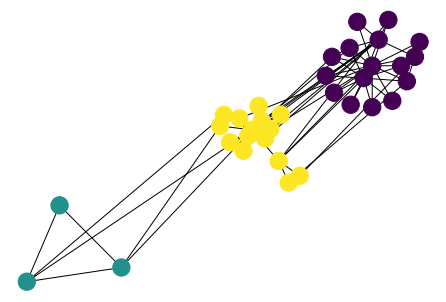

In [0]:
import collections

od = collections.OrderedDict(sorted(map_partition.items()))
pos = community_layout(G, od)

nx.draw(G, pos, node_color=list(od.values()))

#PageRank

In [0]:
pr = nx.pagerank(G, alpha=0.9)

In [0]:
for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True):
  print("node:", k, "pr:", v);


node: 33 pr: 0.10345460652842152
node: 0 pr: 0.09923208031303203
node: 32 pr: 0.07330616298815512
node: 2 pr: 0.05919704684187155
node: 1 pr: 0.0543403155825792
node: 31 pr: 0.037572665335286734
node: 3 pr: 0.036612460562853694
node: 23 pr: 0.03165330491466868
node: 8 pr: 0.030411546757834793
node: 13 pr: 0.030254309009995452
node: 5 pr: 0.028358863602879276
node: 6 pr: 0.028358863602879276
node: 29 pr: 0.02603805549234405
node: 27 pr: 0.025579985022944167
node: 30 pr: 0.024824588072166538
node: 7 pr: 0.024777139411941047
node: 4 pr: 0.02129205163493875
node: 10 pr: 0.02129205163493875
node: 24 pr: 0.02045532726885293
node: 25 pr: 0.020410702877569672
node: 19 pr: 0.019434610880594574
node: 28 pr: 0.01938173195115044
node: 16 pr: 0.015703158296594022
node: 26 pr: 0.014276670024478019
node: 12 pr: 0.014015169158033743
node: 17 pr: 0.01395744128254017
node: 21 pr: 0.01395744128254017
node: 14 pr: 0.013916466828162465
node: 15 pr: 0.013916466828162465
node: 18 pr: 0.013916466828162465
nod

In [0]:
import matplotlib.colors as mcolors
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

{0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  import sys


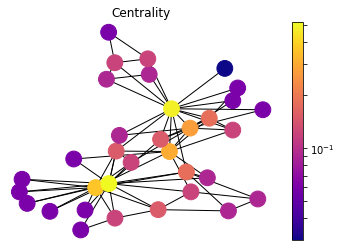

In [0]:
c = nx.degree_centrality(G)
print(c)
pos = nx.spring_layout(G)
#draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')
draw(G, pos, c, 'Centrality')
